In [40]:
import pandas as pd
import psycopg as pg
import json
import matplotlib.pyplot as plt

engine = pg.connect("dbname='cpun' user='cpun' host='149.89.160.100' port='5432' password='C#Gh$!SY3@%vG5'")
df = pd.read_sql('select * from pokedex_pokemon', con=engine)

/tmp/ipykernel_145364/2431719120.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * from pokedex_pokemon', con=engine)


In [41]:
df

,id,card_id,name,rarity,image,prices,highest_market_price
0,1,base1-1,Alakazam,Rare Holo,https://images.pokemontcg.io/base1/1_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,43.54
1,2,base1-4,Charizard,Rare Holo,https://images.pokemontcg.io/base1/4_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,341.45
2,3,base1-5,Clefairy,Rare Holo,https://images.pokemontcg.io/base1/5_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,19.19
3,4,base1-2,Blastoise,Rare Holo,https://images.pokemontcg.io/base1/2_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,123.34
4,5,base1-3,Chansey,Rare Holo,https://images.pokemontcg.io/base1/3_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,27.93
...,...,...,...,...,...,...,...
63,64,base1-63,Squirtle,Common,https://images.pokemontcg.io/base1/63_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,1.37
64,65,base1-66,Tangela,Common,https://images.pokemontcg.io/base1/66_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.36
65,66,base1-67,Voltorb,Common,https://images.pokemontcg.io/base1/67_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.83
66,67,base1-68,Vulpix,Common,https://images.pokemontcg.io/base1/68_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.52


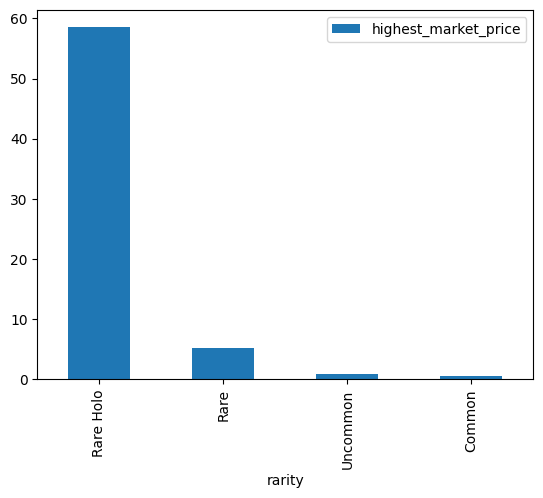

In [58]:
x = df.groupby('rarity').agg({'highest_market_price':'mean'}).sort_values(by='highest_market_price', ascending = False).plot.bar()


y = df.prices


In [56]:
# plt.bar(x[0][0],5)
# plt.show()
fig, ax = plt.Subplot

,highest_market_price
rarity,
Rare Holo,58.479333
Rare,5.256667
Uncommon,0.932500
Common,0.631852
